## Dataworkshop 3miasto - Szacowanie cen nieruchomości - RANDOM FOREST

In [152]:
import pandas as pd
import numpy as np

### WCZYTANIE DANYCH

In [153]:
x_train=pd.read_csv('x_train.csv')
y_train=pd.read_csv('y_train.csv')
x_test=pd.read_csv('x_test.csv')
y_test=pd.read_csv('y_test.csv')
x_val=pd.read_csv('x_val.csv')
y_val=pd.read_csv('y_val.csv')

In [155]:
#y_train

### Złączenie X_TRAIN, X_TEST, X_VAL

In [156]:
x_train['zbior']=1

In [157]:
x_test['zbior']=2

In [158]:
x_val['zbior']=3

In [159]:
df = pd.concat([x_test, x_train, x_val],sort=False, ignore_index =True)

In [160]:
df['zbior'].value_counts()

1    13658
3     4553
2     4553
Name: zbior, dtype: int64

In [161]:
df.head()# sprawdzenie jakie cechy wymagają poprawy jakości danych

,kuchnia,rynek,balkon,liczba_pieter_budynku,rok_budowy,miasto,liczba_pokoi,wykonczenie,ulica,pietro,...,serwis,material_budynku,oferta,ogrzewanie,winda,czynsz,typ_ogrzewania,dodatkowe_informacje,ulica_i_nr,zbior
0,brak,pierwotny,-1,3,2018,Gdynia,3,dowykończenia,-1,0,...,otodom,inne,Oferta biura nieruchomości,inne,0,-1.0,-1,-1,-1,2
1,oddzielna,wtórny,tak,4,2001,Gdynia,3,-1,lukrecjowa,3 / 4,...,morizon,-1,-1,-1,-1,-1.0,-1,-1,-1,2
2,z oknem,wtórny,-1,3,1950,Gdańsk,3,do remontu kapit.,jana husa,2 / 3,...,morizon,cegła,-1,-1,-1,-1.0,-1,-1,-1,2
3,-1,-1,-1,3,2012,-1,3,-1,-1,Parter,...,trojmiasto,-1,-1,-1,-1,-1.0,Co miejskie,"Taras, Siła, Internet, Kuchnia",-1,2
4,-1,-1,-1,10,1975,-1,3,-1,-1,5,...,trojmiasto,-1,-1,-1,-1,-1.0,-1,-1,-1,2


## Dodatkowy preprocessing

### Sprawdzenie braków w danych

In [162]:
df.isna().sum()

kuchnia                  0
rynek                    0
balkon                   0
liczba_pieter_budynku    0
rok_budowy               0
miasto                   0
liczba_pokoi             0
wykonczenie              0
ulica                    0
pietro                   0
rodzaj_zabudowy          0
powierzchnia             0
dzielnica                0
forma-wlasnosci          0
adres                    2
serwis                   0
material_budynku         0
oferta                   0
ogrzewanie               0
winda                    0
czynsz                   0
typ_ogrzewania           0
dodatkowe_informacje     0
ulica_i_nr               0
zbior                    0
dtype: int64

In [163]:
df=df.fillna("-1") # zastąpienie 2 braków w zmiennej adres na -1

In [164]:
df['kuchnia'].value_counts() #71% BRAKÓW DANYCH - nie brałabym do analizy

-1                           15765
brak                          4309
oddzielna                      939
aneks                          520
w aneksie                      475
półotwarta                     260
z oknem                        195
otwarta                        144
brak                           137
bez okna                         6
wnęka                            4
kuchnia otwarta bez okna         3
kuchnia z jadalnią               3
zamknięta                        2
otwarta na pokój                 1
okno na pokój                    1
Name: kuchnia, dtype: int64

In [165]:
df['liczba_pieter_budynku'].value_counts() #mniej niż 1% braków w danych - brałabym do analizy

 4     6359
 3     6072
 2     2525
 10    1745
 5     1517
 6      866
 1      561
 17     560
 7      463
 8      446
-1      374
 11     295
 12     251
 9      214
 0      214
 16     110
 18      92
 13      38
 15      25
 19       7
 20       6
 24       6
 25       4
 28       4
 14       4
 29       3
 23       3
Name: liczba_pieter_budynku, dtype: int64

In [166]:
df['liczba_pokoi'].value_counts() #mniej niż 1 proc. braków - brałabym do analizy

 3     9043
 2     8437
 4     3132
 1     1348
 5      566
 6      152
-1       52
 9       15
 7       13
 10       3
 8        3
Name: liczba_pokoi, dtype: int64

In [167]:
df['pietro'].value_counts() #0% braków w danych - brałabym do analizy

1               4347
2               3341
3               3129
4               1882
Parter          1871
0               1454
5                671
6                389
3 / 3            305
3 / 4            282
parter / 3       276
2 / 3            271
1 / 3            268
1 / 4            265
4 / 4            232
10               218
8                204
7                201
2 / 4            200
9                192
parter / 4       188
1 / 2            181
-1               177
parter / 2       173
2 / 2            155
11               123
4 / 5             61
1 / 5             60
1 / 1             54
1 / 6             54
                ... 
5 / 16             2
2 / 15             1
9 / 15             1
11                 1
3 / 16             1
12 / 16            1
14 / 24            1
6 / 13             1
8 / 25             1
parter / 15        1
17 / 18            1
4 / 16             1
5 / 12             1
8                  1
15 / 16            1
7 / 13             1
5 / 15       

In [79]:
df['powierzchnia'].value_counts() 

38.00     329
45.00     283
53.00     274
60.00     266
50.00     260
54.00     242
63.00     231
48.00     224
65.00     205
46.00     201
70.00     201
42.00     189
67.00     188
47.00     184
44.00     178
43.00     177
49.00     174
40.00     169
56.00     168
64.00     163
55.00     159
58.00     159
30.00     145
28.00     142
37.00     140
52.00     139
41.00     138
33.00     135
48.20     128
85.00     125
         ... 
67.24       1
41.96       1
40.01       1
45.88       1
76.87       1
110.04      1
61.86       1
63.35       1
52.94       1
76.10       1
96.58       1
42.82       1
51.42       1
55.43       1
86.42       1
52.13       1
69.91       1
89.06       1
43.14       1
92.77       1
49.04       1
107.83      1
44.83       1
116.97      1
42.72       1
95.72       1
42.28       1
164.00      1
31.46       1
104.65      1
Name: powierzchnia, Length: 2265, dtype: int64

### Łączenie kolumny ogrzewanie i typ ogrzewania

In [168]:
df['ogrzewanie'].value_counts()

-1              19037
miejskie         3116
gazowe            398
inne              116
elektryczne        67
kotłownia          29
piecekaflowe        1
Name: ogrzewanie, dtype: int64

In [169]:
df['typ_ogrzewania'].value_counts() #moja propozycja, żeby połączyć te dwie cechy tak żeby były katedorie wyznaczone w cesze "ogrzewanie"

-1                                                  15613
Co miejskie                                          3380
C. o. miejskie                                       1180
Miejskie                                              824
Gazowe                                                813
Centralne                                             174
Co własne                                             166
Elektryczne                                           151
Ogrzewanie miejskie                                    72
Co                                                     64
C. o.                                                  46
C. o. z sieci miejskiej                                46
C. o. gazowe                                           29
Kotłownia lokalna                                      22
Inne                                                   19
Ogrzewanie na gaz miejski                              16
Miejski                                                12
Kotłownia     

In [170]:
df["ogrzewanie_merged"] = df.ogrzewanie + df.typ_ogrzewania
df["ogrzewanie_merged"].value_counts()

-1-1                                                  11886
-1Co miejskie                                          3380
miejskie-1                                             3116
-1C. o. miejskie                                       1180
-1Miejskie                                              824
-1Gazowe                                                813
gazowe-1                                                398
-1Centralne                                             174
-1Co własne                                             166
-1Elektryczne                                           151
inne-1                                                  116
-1Ogrzewanie miejskie                                    72
elektryczne-1                                            67
-1Co                                                     64
-1C. o.                                                  46
-1C. o. z sieci miejskiej                                46
kotłownia-1                             

In [171]:
df.ogrzewanie_merged =df.ogrzewanie_merged.str.replace("-1-1",'-1')
df.ogrzewanie_merged =df.ogrzewanie_merged.str.replace("-1","")
df["ogrzewanie_merged"].value_counts()

                                                    11886
Co miejskie                                          3380
miejskie                                             3116
C. o. miejskie                                       1180
Miejskie                                              824
Gazowe                                                813
gazowe                                                398
Centralne                                             174
Co własne                                             166
Elektryczne                                           151
inne                                                  116
Ogrzewanie miejskie                                    72
elektryczne                                            67
Co                                                     64
C. o. z sieci miejskiej                                46
C. o.                                                  46
C. o. gazowe                                           29
kotłownia     

In [172]:
df.ogrzewanie_merged = df.ogrzewanie_merged.str.lower()
df["ogrzewanie_merged"].value_counts()

                                        11886
miejskie                                 3940
co miejskie                              3380
gazowe                                   1211
c. o. miejskie                           1180
elektryczne                               218
centralne                                 174
co własne                                 166
inne                                      135
ogrzewanie miejskie                        72
co                                         64
c. o.                                      46
c. o. z sieci miejskiej                    46
kotłownia                                  41
c. o. gazowe                               29
kotłownia lokalna                          22
ogrzewanie na gaz miejski                  16
miejski                                    12
pompa ciepła                                8
gaz                                         6
kominkowe                                   6
c. o                              

In [173]:
df.ogrzewanie_merged = df.ogrzewanie_merged.apply(lambda x: "miejskie" if 'miejskie' in x else x)
df.ogrzewanie_merged = df.ogrzewanie_merged.apply(lambda x: "miejskie" if 'miejske' in x else x)
df.ogrzewanie_merged = df.ogrzewanie_merged.apply(lambda x: "miejskie" if 'miejski' in x else x)
df.ogrzewanie_merged = df.ogrzewanie_merged.apply(lambda x: "miejskie" if 'sieć miejska' in x else x)
df.ogrzewanie_merged = df.ogrzewanie_merged.apply(lambda x: "miejskie" if 'miasto' in x else x)
df.ogrzewanie_merged = df.ogrzewanie_merged.apply(lambda x: "c. o." if 'c. o' in x else x)
df.ogrzewanie_merged = df.ogrzewanie_merged.apply(lambda x: "c. o." if 'co' in x else x)
df.ogrzewanie_merged = df.ogrzewanie_merged.apply(lambda x: "centralne" if 'centr' in x else x)
df.ogrzewanie_merged = df.ogrzewanie_merged.apply(lambda x: "centralne" if 'cen' in x else x)
df.ogrzewanie_merged = df.ogrzewanie_merged.apply(lambda x: "kotłownia" if 'kotłownia w bloku' in x else x)
df.ogrzewanie_merged = df.ogrzewanie_merged.apply(lambda x: "kotłownia" if 'kotłownia lokalna' in x else x)
df.ogrzewanie_merged = df.ogrzewanie_merged.apply(lambda x: "gazowe" if 'gaz' in x else x)
df.ogrzewanie_merged = df.ogrzewanie_merged.apply(lambda x: "elektryczne" if 'elektryczne' in x else x)
df.ogrzewanie_merged = df.ogrzewanie_merged.apply(lambda x: "inne" if 'pompa ciepła' in x else x)
df.ogrzewanie_merged = df.ogrzewanie_merged.apply(lambda x: "inne" if 'kominkowe' in x else x)
df.ogrzewanie_merged = df.ogrzewanie_merged.apply(lambda x: "inne" if 'etażowe' in x else x)
df.ogrzewanie_merged = df.ogrzewanie_merged.apply(lambda x: "inne" if 'piec' in x else x)
df.ogrzewanie_merged = df.ogrzewanie_merged.apply(lambda x: "inne" if 'węglowe' in x else x)
df.ogrzewanie_merged = df.ogrzewanie_merged.apply(lambda x: "inne" if 'podłogowe' in x else x)
df.ogrzewanie_merged = df.ogrzewanie_merged.apply(lambda x: "inne" if 'logotermy' in x else x)
df.ogrzewanie_merged = df.ogrzewanie_merged.apply(lambda x: "inne" if 'oc' in x else x)
df.ogrzewanie_merged = df.ogrzewanie_merged.apply(lambda x: "inne" if 'piecekaflowe' in x else x)
df.ogrzewanie_merged = df.ogrzewanie_merged.apply(lambda x: "inne" if 'ec' in x else x)
df.ogrzewanie_merged = df.ogrzewanie_merged.apply(lambda x: "" if '-1' in x else x)
df["ogrzewanie_merged"].value_counts() ##54% BRAKÓW DANYCH

               11886
miejskie        8671
gazowe          1230
c. o.            327
elektryczne      220
centralne        195
inne             165
kotłownia         65
brak               3
(nieznane)         2
Name: ogrzewanie_merged, dtype: int64

In [174]:
#KOMENTARZ
#MIMO POPRAWY W BRAKACH DANYCH I TAK ICH SPORO
##54% BRAKÓW DANYCH

### Zamiana braków danych w cesze "rynek" na podstawie roku budowy

In [175]:
df['rynek'].value_counts()

-1           13368
wtórny        6907
pierwotny     2489
Name: rynek, dtype: int64

In [176]:
df['rok_budowy'].value_counts() #100% DANYCH

2020    2135
2019    2022
1980    1123
1970     941
2021     863
2018     839
2012     691
2017     647
2013     551
1960     509
2011     505
2016     479
1950     433
2009     427
1975     405
2000     396
2015     389
2010     380
1978     352
2008     350
1930     336
2014     304
2007     302
2006     296
1976     289
1920     285
2005     253
2003     240
1910     217
1900     210
        ... 
1911      14
1908      13
1895      12
1951      12
1961      12
1896      11
1916      11
1917      11
1927      10
1949       9
1924       7
1942       7
1941       7
1893       5
1933       5
1498       4
2029       4
1931       4
1909       4
1809       3
1888       3
1875       3
1913       3
1922       2
1891       2
1914       2
1899       2
1947       2
1919       2
1943       2
Name: rok_budowy, Length: 132, dtype: int64

In [178]:
#df[df['rok_budowy']>=2020] # rynek pierwotny

In [179]:
df['rynek2']=np.where(df['rok_budowy']<2020, 'wtórny', 'pierwotny')
df['rynek2'].value_counts() # 100% DANYCH

wtórny       19643
pierwotny     3121
Name: rynek2, dtype: int64

### Rozbicie cechy "dodatkowe informacje" do uzupełnienia braków w danych

In [180]:
df['dodatkowe_informacje'].value_counts()

-1                                                                                                                                                                                                        13796
Piwnica                                                                                                                                                                                                     358
Balkon, Piwnica                                                                                                                                                                                             279
Balkon, Miejsce parkingowe                                                                                                                                                                                  267
Balkon, Winda, Miejsce parkingowe                                                                                                                                       

In [183]:
df['winda1']=np.where(df['dodatkowe_informacje']=='winda', '1', '0')

In [184]:
df['winda1'].value_counts()

0    22764
Name: winda1, dtype: int64

In [186]:
df['dodatkowe_informacje'].str.split(",")

0                                                     [-1]
1                                                     [-1]
2                                                     [-1]
3                      [Taras,  Siła,  Internet,  Kuchnia]
4                                                     [-1]
5                                                     [-1]
6                                                     [-1]
7                                                     [-1]
8        [Balkon,  Garaż,  Siła,  Piwnica,  Internet,  ...
9        [Winda,  Ogródek,  Woda,  Kanalizacja,  Miejsc...
10       [Balkon,  Garaż,  Winda,  Siła,  Piwnica,  Int...
11                                                    [-1]
12         [Gaz,  Woda,  Kanalizacja,  Piwnica,  Internet]
13                                                    [-1]
14                                                    [-1]
15                                                    [-1]
16                           [Balkon,  Miejsce parkingow

In [187]:
winda=[]
balkon=[]
piwnica=[]
miejsce_parkingowe=[]
for i in df['dodatkowe_informacje']:
    if "Winda" in i:
        winda.append('tak') 
    else:
        winda.append(-1)
    if "Balkon" in i:
        balkon.append("tak") 
    else:
        balkon.append(-1)
    if "Piwnica" in i:
        piwnica.append('tak') 
    else:
        piwnica.append(-1)
    if  "Garaż" in i or "Miejsce parkingowe" in i:
        miejsce_parkingowe.append('tak') 
    else:
        miejsce_parkingowe.append(-1)

In [188]:
df['piwnica']=piwnica
df['miejsce_parkingowe']=miejsce_parkingowe
df['balkon1']=balkon
df['winda1']=winda

In [189]:
df['piwnica'].value_counts() # 80% BRAKÓW W DANYCH!

-1     17757
tak     5007
Name: piwnica, dtype: int64

In [190]:
df['miejsce_parkingowe'].value_counts() # 80% BRAKÓW W DANYCH

-1     17451
tak     5313
Name: miejsce_parkingowe, dtype: int64

In [191]:
df['balkon1'].value_counts()

-1     17713
tak     5051
Name: balkon1, dtype: int64

In [192]:
df['balkon'].value_counts()

-1      20133
tak      2325
nie       306
Name: balkon, dtype: int64

In [193]:
df["balkon_merged"] = df.balkon.astype(str) + df.balkon1.astype(str)
df["balkon_merged"].value_counts()

-1-1      15082
-1tak      5051
tak -1     2325
nie -1      306
Name: balkon_merged, dtype: int64

In [194]:
df.balkon_merged =df.balkon_merged.str.replace("-1-1","-1")
df.balkon_merged =df.balkon_merged.str.replace("-1tak",'tak')
df.balkon_merged =df.balkon_merged.str.replace("tak -1",'tak')
df.balkon_merged =df.balkon_merged.str.replace("nie -1",'nie')
df["balkon_merged"].value_counts() # 68% BRAKÓW W DANYCH

-1     15082
tak     7376
nie      306
Name: balkon_merged, dtype: int64

In [195]:
df['winda1'].value_counts()

-1     19223
tak     3541
Name: winda1, dtype: int64

In [196]:
df['winda'].value_counts()

-1    17773
 0     2793
 1     2198
Name: winda, dtype: int64

In [197]:
df["winda_merged"] = df.winda.astype(str) + df.winda1.astype(str)
df["winda_merged"].value_counts()

-1-1     14232
-1tak     3541
0-1       2793
1-1       2198
Name: winda_merged, dtype: int64

In [198]:
df.winda_merged =df.winda_merged.str.replace("-1-1","-1")
df.winda_merged =df.winda_merged.str.replace("-1tak",'tak')
df.winda_merged =df.winda_merged.str.replace("0-1",'nie')
df.winda_merged =df.winda_merged.str.replace("1-1",'tak')
df["winda_merged"].value_counts() #64% BRAKÓW W DANYCH

-1     14232
tak     5739
nie     2793
Name: winda_merged, dtype: int64

In [200]:
#KOMENTARZ
# MIMO DZIAŁAŃ ZWIĄZANYCH Z BRAKAMI DANYCH I TAK MAMY PONAD 50% BRAKÓW W DANYCH :<

### Uporządkowanie takich cech jak: 'wykonczenie', 'materiał budynku', 'ogrzewanie','forma wlasnosci'

In [201]:
df['wykonczenie'].value_counts()

-1                                    17174
dozamieszkania                         2322
dowykończenia                          1133
wysoki standard                         460
doremontu                               308
dobry                                   228
do remontu                              214
do wykończenia                          187
bardzo wysoki standard                  170
deweloperski                            164
bardzo dobry                            115
do odświeżenia                           95
stan deweloperski                        65
do adaptacji                             21
świeżo po remoncie                       18
normalny                                 15
do remontu kapit.                        15
idealny                                  13
do wprowadzenia                          11
nowy                                     11
po generalnym remoncie                    5
po remoncie                               4
do odnowienia                   

In [202]:
df.wykonczenie = df.wykonczenie.apply(lambda x: "do remontu" if 'doremontu' in x else x)
df.wykonczenie = df.wykonczenie.apply(lambda x: "do wykończenia" if 'dowykończenia' in x else x)
df.wykonczenie = df.wykonczenie.apply(lambda x: "do remontu" if 'do odświeżenia' in x else x)
df.wykonczenie = df.wykonczenie.apply(lambda x: "do remontu" if 'do odnowienia' in x else x)
df.wykonczenie = df.wykonczenie.apply(lambda x: "do remontu" if 'do remontu kapit.' in x else x)
df.wykonczenie = df.wykonczenie.apply(lambda x: "do zamieszkania" if 'dozamieszkania' in x else x)
df.wykonczenie = df.wykonczenie.apply(lambda x: "do zamieszkania" if 'do wprowadzenia' in x else x)
df.wykonczenie = df.wykonczenie.apply(lambda x: "stan deweloperski" if 'deweloperski' in x else x)
df.wykonczenie = df.wykonczenie.apply(lambda x: "po remoncie" if 'po generalnym remoncie' in x else x)
df.wykonczenie = df.wykonczenie.apply(lambda x: "po remoncie" if 'świeżo po remoncie' in x else x)
df.wykonczenie = df.wykonczenie.apply(lambda x: "po remoncie" if 'po odświeżeniu' in x else x)
df.wykonczenie = df.wykonczenie.apply(lambda x: "dobry" if 'dobry poziom' in x else x)

In [203]:
df['wykonczenie'].value_counts() #78% braków danych

-1                        17174
do zamieszkania            2333
do wykończenia             1320
do remontu                  637
wysoki standard             460
stan deweloperski           229
dobry                       229
bardzo wysoki standard      170
bardzo dobry                115
po remoncie                  28
do adaptacji                 21
normalny                     15
idealny                      13
nowy                         11
podwyższony                   3
wykończony                    2
luksusowy                     2
komfort                       2
Name: wykonczenie, dtype: int64

In [204]:
df.material_budynku = df.material_budynku.apply(lambda x: "cegła" if 'cegła czerwona' in x else x)
df.material_budynku = df.material_budynku.apply(lambda x: "cegła" if 'cegła przedwojenna' in x else x)
df.material_budynku = df.material_budynku.apply(lambda x: "cegła" if 'cegła stara' in x else x)
df.material_budynku = df.material_budynku.apply(lambda x: "cegła" if 'cegła + styropian' in x else x)
df.material_budynku = df.material_budynku.apply(lambda x: "beton" if 'betonkomórkowy' in x else x)
df.material_budynku = df.material_budynku.apply(lambda x: "beton" if 'beton komórkowy' in x else x)
df.material_budynku = df.material_budynku.apply(lambda x: "mieszana" if 'beton, cegła' in x else x)
df.material_budynku = df.material_budynku.apply(lambda x: "żelbet" if 'konstrukcja żelbetowa' in x else x)
df.material_budynku = df.material_budynku.apply(lambda x: "mieszana" if 'cegła, płyta' in x else x)
df.material_budynku = df.material_budynku.apply(lambda x: "mieszana" if 'beton, ocieplony, płyta' in x else x)
df.material_budynku = df.material_budynku.apply(lambda x: "mieszana" if 'beton, płyta' in x else x)
df.material_budynku = df.material_budynku.apply(lambda x: "inna" if 'murowana' in x else x)
df.material_budynku = df.material_budynku.apply(lambda x: "inna" if 'porotherm' in x else x)
df.material_budynku = df.material_budynku.apply(lambda x: "inna" if 'rama h' in x else x)
df.material_budynku = df.material_budynku.apply(lambda x: "inna" if 'gazobeton' in x else x)
df.material_budynku = df.material_budynku.apply(lambda x: "inna" if 'drewno' in x else x)
df.material_budynku = df.material_budynku.apply(lambda x: "inna" if 'bloczki' in x else x)
df.material_budynku = df.material_budynku.apply(lambda x: "inna" if 'pustak żużlowy' in x else x)
df.material_budynku = df.material_budynku.apply(lambda x: "inna" if 'cement' in x else x)
df.material_budynku = df.material_budynku.apply(lambda x: "inna" if 'pustak ceramiczny' in x else x)
df.material_budynku = df.material_budynku.apply(lambda x: "inna" if 'płyta po termomodernizacji' in x else x)
df.material_budynku = df.material_budynku.apply(lambda x: "mieszana" if 'zróżnicowany' in x else x)

In [205]:
df['material_budynku'].value_counts()# 87% BRAKÓW DANYCH

-1              19185
cegła            1384
wielka płyta      595
pustak            529
inne              437
silikat           224
mieszana          138
beton              77
ytong              72
żelbet             72
inna               27
tradycyjna         24
Name: material_budynku, dtype: int64

In [206]:
df['forma-wlasnosci']=df['forma-wlasnosci'].str.lower().str.strip()

In [207]:
df["forma-wlasnosci"] = df["forma-wlasnosci"].replace("spółdzielcze-własnościowe",'spółdzielcze własnościowe')
df["forma-wlasnosci"] = df["forma-wlasnosci"].replace("spółdzielcze-własnościowe z kw",'spółdzielcze własnościowe z kw')
df["forma-wlasnosci"] = df["forma-wlasnosci"].replace("spół. własnościowe z kw",'spółdzielcze własnościowe z kw')
df["forma-wlasnosci"] = df["forma-wlasnosci"].replace("spółdzielcza własnościowa z kw",'spółdzielcze własnościowe z kw')
df["forma-wlasnosci"] = df["forma-wlasnosci"].replace("własność",'pełna własność')
df["forma-wlasnosci"] = df["forma-wlasnosci"].replace("odrębna własność lokalu",'odrębna własność')
df["forma-wlasnosci"] = df["forma-wlasnosci"].replace("-",'-1')
df["forma-wlasnosci"] = df["forma-wlasnosci"].replace("(nieznany)",'-1')
df["forma-wlasnosci"] = df["forma-wlasnosci"].replace("spółdzielcze wł. z kw",'spółdzielcze własnościowe z kw')
df["forma-wlasnosci"] = df["forma-wlasnosci"].replace("spół. własnościowe",'spółdzielcze własnościowe')
df["forma-wlasnosci"] = df["forma-wlasnosci"].replace("wieczyste użytkowanie",'użytkowanie wieczyste')
df["forma-wlasnosci"] = df["forma-wlasnosci"].replace("hipoteczne",'pełna własność (hipoteczne)')
df["forma-wlasnosci"] = df["forma-wlasnosci"].replace("pełna własność(hipoteczne)",'pełna własność (hipoteczne)')
df["forma-wlasnosci"] = df["forma-wlasnosci"].replace("ekspektatywa",'inna')


In [209]:
df['forma-wlasnosci'].value_counts() #95% BRAKÓW W DANYCH

-1                                  20939
pełna własność                       1577
spółdzielcze własnościowe             100
spółdzielcze własnościowe z kw         89
odrębna własność                       32
inna                                   10
pełna własność (hipoteczne)             6
użytkowanie wieczyste                   4
współwłasność                           3
spółdzielcza własnościowa bez kw        3
umowa z developerem                     1
Name: forma-wlasnosci, dtype: int64

### Dzielnica - przyporządkowanie dzielnicy na podstawie cechy adres

In [210]:
df['adres'].value_counts()

Gdańsk,Śródmieście,pomorskie                           281
Gdańsk,Wrzeszcz,pomorskie                              217
Gdańsk, Śródmieście                                    202
Gdańsk, Wrzeszcz, Grudziądzka                          164
Gdańsk, Wrzeszcz                                       154
Gdańsk,Przymorze,pomorskie                             151
Gdańsk, Śródmieście, Wałowa                            148
Gdańsk, Przymorze                                      141
Gdynia, pomorskie                                      137
Gdańsk, Morena, Myśliwska                              126
Gdynia, Oksywie                                        111
Sopot, Wyścigi, Karlikowo, Władysława, Łokietka        111
Gdańsk, Przymorze, Obrońców, Wybrzeża                  101
Sopot, Dolny, Sopot, Niepodległości                     99
Gdańsk,Jasień,pomorskie                                 98
gdańsk, piecki-migowo, morena,                          91
Gdańsk, Długie, Ogrody, Szafarnia                       

In [211]:
df['adres']=df['adres'].str.split(",")

In [212]:
df['adres']

0                           [Gdynia,  Orłowo,  Wrocławska]
1                          [gdynia,  dąbrowa,  lukrecjowa]
2                             [gdańsk,  oliwa,  jana husa]
3                 [Gdańsk,  Morena,  Królewskie,  Wzgórze]
4                [Gdańsk,  Wrzeszcz,  Joachima,  Lelewela]
5        [gdańsk,  orunia górna,  gen. kazimierza sosnk...
6        [Gdańsk,  Piecki-Migowo,  Morena,  ul. Stanisł...
7                         [Gdańsk, ORUNIAGÓRNA, pomorskie]
8             [Gdańsk,  Szadółki,  Aleksandry,  Gabrysiak]
9                                       [Gdańsk,  Aniołki]
10                       [Gdańsk,  Wrzeszcz,  Grudziądzka]
11                           [Gdańsk, Wrzeszcz, pomorskie]
12             [Gdańsk,  Wrzeszcz,  Jana,  Kochanowskiego]
13                     [Gdańsk,  Śródmieście,  Chlebnicka]
14       [gdynia,  kamienna góra,  stanisława wyspiańsk...
15                           [Gdańsk, Wrzeszcz, pomorskie]
16                               [Gdańsk,  Kowale,  Zeus

In [213]:
dzielnica=[]
for i in df['adres']:
    try:
        if i is not np.nan:
            dzielnica.append(i[1])
        else:
            dzielnica.append('-1')
    except IndexError:
        dzielnica.append('-1')

In [214]:
df['dzielnica1']=dzielnica

In [215]:
df['dzielnica1'].value_counts()

 Śródmieście                  1817
 Wrzeszcz                     1254
 Przymorze                     943
 Dolny                         649
 Morena                        519
 śródmieście                   506
 Jasień                        456
 Zaspa                         429
 Brzeźno                       355
 Obłuże                        349
 Oksywie                       347
Śródmieście                    345
 Oliwa                         341
 Długie                        300
 Witomino                      279
 Chełm                         278
 Piecki-Migowo                 277
 wrzeszcz                      277
 Dąbrowa                       269
 Ujeścisko-Łostowice           267
 Wyścigi                       264
 Ujeścisko                     252
 Chylonia                      235
 Siedlce                       232
 Osowa                         227
 Redłowo                       218
 gdańsk                        218
Wrzeszcz                       217
 Pogórze            

In [216]:
df.dzielnica1=df.dzielnica1.replace(np.nan,'-1')

In [217]:
df['dzielnica']=df['dzielnica'].str.lower().str.strip()

In [219]:
df['dzielnica1']=df['dzielnica1'].str.lower().str.strip() #DANA NIE DOKŁADNE - LEPIEJ ZAJĄĆ SIĘ SZEROKOŚCIĄ I DŁUGOŚCIĄ GEOGRAFICZNĄ -> PATRZ KOD DARKA!

### Kodowanie danych kategorialnych

In [220]:
cat_feats=['rodzaj_zabudowy', 'dzielnica', 'forma-wlasnosci','kuchnia','rynek','balkon','miasto','wykonczenie',
           'ulica','serwis','material_budynku','typ_ogrzewania','dodatkowe_informacje','ulica_i_nr' 
           ,'oferta','ogrzewanie','dzielnica1','ogrzewanie_merged','rynek2','miejsce_parkingowe','winda_merged',
           'balkon_merged','piwnica']

for feat in cat_feats:
    new_name='{}'.format(feat.lower())
    df[new_name]=df[feat].factorize()[0]

In [221]:
df.head()

,kuchnia,rynek,balkon,liczba_pieter_budynku,rok_budowy,miasto,liczba_pokoi,wykonczenie,ulica,pietro,...,zbior,ogrzewanie_merged,rynek2,winda1,piwnica,miejsce_parkingowe,balkon1,balkon_merged,winda_merged,dzielnica1
0,0,0,0,3,2018,0,3,0,0,0,...,2,0,0,-1,0,0,-1,0,0,0
1,1,1,1,4,2001,0,3,1,1,3 / 4,...,2,1,0,-1,0,0,-1,1,1,1
2,2,1,0,3,1950,1,3,2,2,2 / 3,...,2,1,0,-1,0,0,-1,0,1,2
3,3,2,0,3,2012,2,3,1,0,Parter,...,2,2,0,-1,0,0,-1,0,1,3
4,3,2,0,10,1975,2,3,1,0,5,...,2,1,0,-1,0,0,-1,0,1,4


In [222]:
# WYCIĄGNIECIE ZMIENNEJ ILOŚCIOWEJ Z CECHY PIETRO
df['pietro']=df['pietro'].replace('Parter',0).replace('parter ',0)
df['pietro']=df['pietro'].map(lambda x: str(x).split('/')[0])

In [223]:
df['pietro']=df['pietro'].replace('parter ',0)

In [224]:
df['pietro']=df['pietro'].astype('int')

In [225]:
df['pietro'].value_counts()

 1     5357
 2     4156
 0     4142
 3     3893
 4     2284
 5      824
 6      494
 10     272
 8      257
 7      257
 9      233
-1      177
 11     148
 17      60
 12      51
 15      45
 14      40
 16      39
 13      20
 18      13
 25       2
Name: pietro, dtype: int64

In [226]:
df.head()

,kuchnia,rynek,balkon,liczba_pieter_budynku,rok_budowy,miasto,liczba_pokoi,wykonczenie,ulica,pietro,...,zbior,ogrzewanie_merged,rynek2,winda1,piwnica,miejsce_parkingowe,balkon1,balkon_merged,winda_merged,dzielnica1
0,0,0,0,3,2018,0,3,0,0,0,...,2,0,0,-1,0,0,-1,0,0,0
1,1,1,1,4,2001,0,3,1,1,3,...,2,1,0,-1,0,0,-1,1,1,1
2,2,1,0,3,1950,1,3,2,2,2,...,2,1,0,-1,0,0,-1,0,1,2
3,3,2,0,3,2012,2,3,1,0,0,...,2,2,0,-1,0,0,-1,0,1,3
4,3,2,0,10,1975,2,3,1,0,5,...,2,1,0,-1,0,0,-1,0,1,4


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22764 entries, 0 to 22763
Data columns (total 34 columns):
kuchnia                  22764 non-null int64
rynek                    22764 non-null int64
balkon                   22764 non-null int64
liczba_pieter_budynku    22764 non-null int64
rok_budowy               22764 non-null int64
miasto                   22764 non-null int64
liczba_pokoi             22764 non-null int64
wykonczenie              22764 non-null int64
ulica                    22764 non-null int64
pietro                   22764 non-null int32
rodzaj_zabudowy          22764 non-null int64
powierzchnia             22764 non-null float64
dzielnica                22764 non-null int64
forma-wlasnosci          22764 non-null int64
adres                    22764 non-null object
serwis                   22764 non-null int64
material_budynku         22764 non-null int64
oferta                   22764 non-null int64
ogrzewanie               22764 non-null int64
winda         

### Podzielenie zbioru danych na X_TRAIN, X_VAL, X_TEST

### X_TRAIN

In [228]:
X_train=df[df['zbior']==1]

In [229]:
X_train.columns

Index(['kuchnia', 'rynek', 'balkon', 'liczba_pieter_budynku', 'rok_budowy',
       'miasto', 'liczba_pokoi', 'wykonczenie', 'ulica', 'pietro',
       'rodzaj_zabudowy', 'powierzchnia', 'dzielnica', 'forma-wlasnosci',
       'adres', 'serwis', 'material_budynku', 'oferta', 'ogrzewanie', 'winda',
       'czynsz', 'typ_ogrzewania', 'dodatkowe_informacje', 'ulica_i_nr',
       'zbior', 'ogrzewanie_merged', 'rynek2', 'winda1', 'piwnica',
       'miejsce_parkingowe', 'balkon1', 'balkon_merged', 'winda_merged',
       'dzielnica1'],
      dtype='object')

### X_TEST

In [230]:
X_test=df[df['zbior']==2]

In [231]:
X_test.shape

(4553, 34)

### X_VAL

In [232]:
X_val=df[df['zbior']==3]

In [233]:
X_val.shape

(4553, 34)

## Pozbywamny się niektórych cech z naszych danych

In [234]:
list = ['rynek2', 'liczba_pieter_budynku', 'rok_budowy',
       'miasto', 'liczba_pokoi', 'pietro', 'powierzchnia'] # OSTATEZCNIE UWAŻAM, ŻE NAJLEPIEJ TE CECHY WZIĄĆ PLUS SZEROKOŚĆ I DŁUGOŚĆ GEOGRAFICZNĄ

In [235]:
X_val = X_val[list]

In [236]:
X_train = X_train[list]
X_test=X_test[list]

In [237]:
X_train.columns

Index(['rynek2', 'liczba_pieter_budynku', 'rok_budowy', 'miasto',
       'liczba_pokoi', 'pietro', 'powierzchnia'],
      dtype='object')

In [238]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13658 entries, 4553 to 18210
Data columns (total 7 columns):
rynek2                   13658 non-null int64
liczba_pieter_budynku    13658 non-null int64
rok_budowy               13658 non-null int64
miasto                   13658 non-null int64
liczba_pokoi             13658 non-null int64
pietro                   13658 non-null int32
powierzchnia             13658 non-null float64
dtypes: float64(1), int32(1), int64(5)
memory usage: 800.3 KB


In [239]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4553 entries, 0 to 4552
Data columns (total 7 columns):
rynek2                   4553 non-null int64
liczba_pieter_budynku    4553 non-null int64
rok_budowy               4553 non-null int64
miasto                   4553 non-null int64
liczba_pokoi             4553 non-null int64
pietro                   4553 non-null int32
powierzchnia             4553 non-null float64
dtypes: float64(1), int32(1), int64(5)
memory usage: 266.8 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014617FE9C18>]],
      dtype=object)

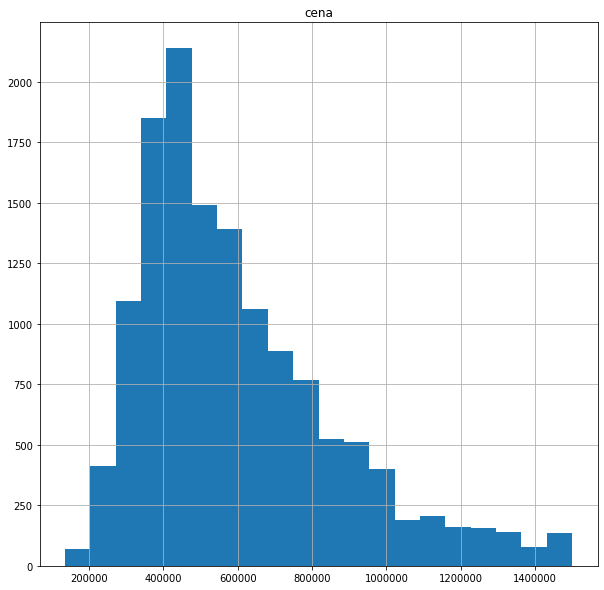

In [240]:
%matplotlib inline
y_train.hist(bins=20, figsize=(10,10))

In [241]:
y_train_log = np.log(y_train)
y_val_log=np.log(y_val) 
y_test_log = np.log(y_test)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001460C7A2978>]],
      dtype=object)

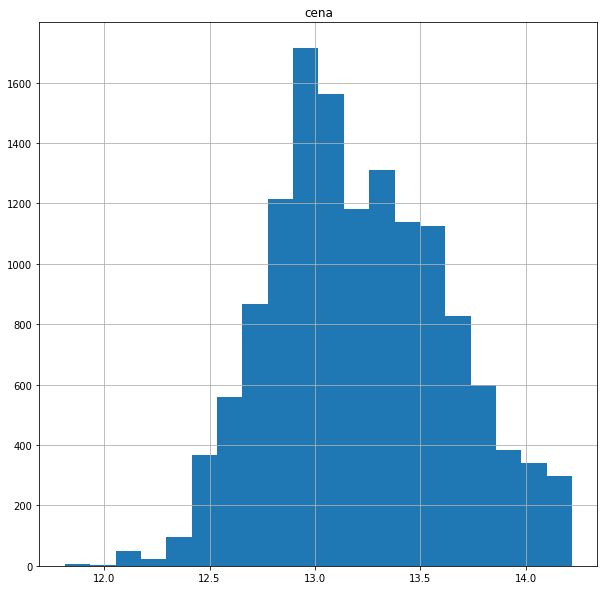

In [242]:
y_train_log.hist(bins=20, figsize=(10,10))

## Model RandomForest

In [243]:
y_train.shape

(13658, 1)

In [244]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from ml_metrics import rmsle


model = RandomForestRegressor(random_state=2020, 
n_estimators=100, #default=100 #HYPEROPT DO ZASTOSOWANIA!
max_depth=15 #default=None
)
                              
model.fit(X_train, y_train.values.ravel())

def custom_rmsle(model, X_test, y_test):
    y_pred=model.predict(X_test)
    y_pred[y_pred<0]=0
    
    return rmsle(y_test, y_pred)

cross_val_score(model, X_val, y_val.values.ravel(), cv=5, scoring=custom_rmsle) #walidacja krzyżowa

array([0.20447084, 0.20842024, 0.21289729, 0.19988201, 0.1943713 ])

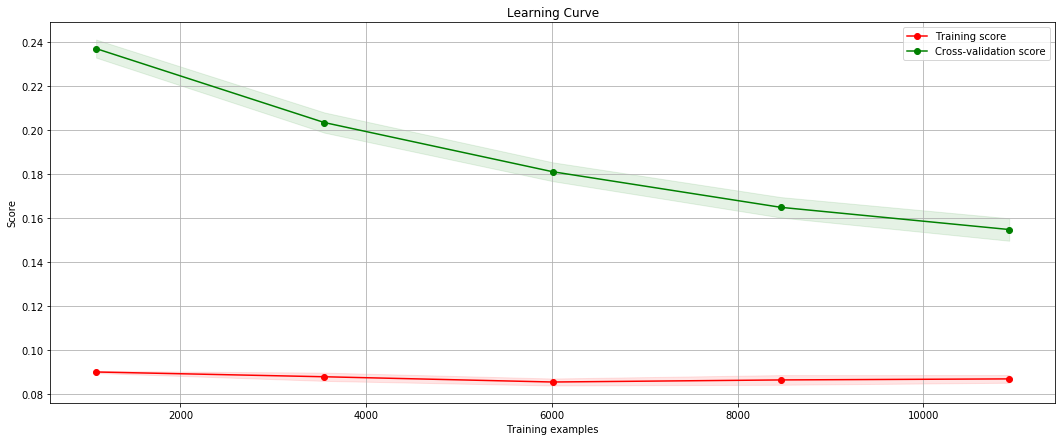

In [148]:
from scikitplot.estimators import plot_learning_curve
plot_learning_curve(model, X_train, y_train.values.ravel(), cv=5, figsize=(18,7), scoring=custom_rmsle)

### Model RandomForest - zmienna objaśniająca (y) w postaci logarytmów

In [149]:
model.fit(X_train, y_train_log.values.ravel())

def custom_rmsle(model, X_test, y_test_log):
    y_pred_log=model.predict(X_test)
    y_pred_log[y_pred_log<0]=0
    
    return rmsle(y_test_log, y_pred_log)

cross_val_score(model, X_val, y_val_log.values.ravel(), cv=5, scoring=custom_rmsle) #walidacja krzyżowa

array([0.01395737, 0.01444413, 0.01471769, 0.01384264, 0.01338   ])

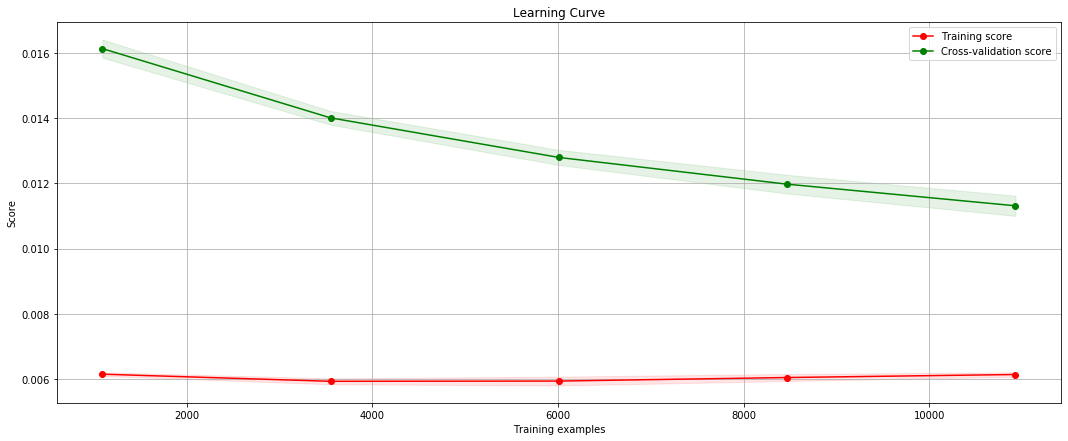

In [101]:
from scikitplot.estimators import plot_learning_curve
plot_learning_curve(model, X_train, y_train_log.values.ravel(), cv=5, figsize=(18,7), scoring=custom_rmsle)

### Ważność cech w modelu

In [76]:
pip install sklearn.inspection

Note: you may need to restart the kernel to use updated packages.


  ERROR: Could not find a version that satisfies the requirement sklearn.inspection (from versions: none)
ERROR: No matching distribution found for sklearn.inspection


In [150]:
from eli5.sklearn import PermutationImportance
import eli5

In [151]:
zmienne=X_train.columns
zmienne=zmienne.tolist()
features = zmienne
perm = PermutationImportance(model, #random_state=123
                            ).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = features)

Weight,Feature
0.0000 ± 0.0000,powierzchnia
0.0000 ± 0.0000,rok_budowy
0.0000 ± 0.0000,liczba_pieter_budynku
0.0000 ± 0.0000,pietro
0.0000 ± 0.0000,miasto
0.0000 ± 0.0000,rynek2
-0.0000 ± 0.0000,liczba_pokoi


### GridSearchCV - Dobieranie najlepszych parametrów do modelu

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
grid_param = {  
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [4, 5, 6, 7],
    'max_features':[20,10,5,2],
    'min_samples_split':[200, 100,50,20]
}

In [98]:
grid_search = GridSearchCV(estimator=model,  
                     param_grid=grid_param,
                        scoring='r2')#DO POPRAWIENIA SCORING MAKE SCORER

In [99]:
grid_search.fit(X_train, y_train) 
 
best_parameters = grid_search.best_params_  
print(best_parameters) 
#{'max_depth': 7, 'max_features': 20, 'min_samples_split': 20, 'n_estimators': 500}

C:\Users\kasia\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\kasia\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kasia\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kasia\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected

{'max_depth': 7, 'max_features': 20, 'min_samples_split': 20, 'n_estimators': 500}


In [95]:
model = RandomForestRegressor(**best_parameters)
model.fit(X_train, y_train)  

C:\Users\kasia\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

### Random Search - Dobieranie najlepszych parametrów do modelu

In [137]:
from sklearn.model_selection import RandomizedSearchCV

In [146]:
random_param= {  
    'n_estimators': range(50, 100),
    'max_depth': range(4,6),
    'max_features':range(5,15),
    'min_samples_split':range(50,200)
}

In [147]:
random_search = RandomizedSearchCV(estimator=model
                                 , param_distributions=random_param
                                 , n_iter=4*4*4*2
                                 , scoring='r2' )

In [148]:
random_search.fit(X=X_train, y=y_train)
 
best_parameters = random_search.best_params_  
print(best_parameters) 
#{'n_estimators': 56, 'min_samples_split': 50, 'max_features': 14, 'max_depth': 5}

C:\Users\kasia\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kasia\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kasia\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\kasia\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y wa

{'n_estimators': 56, 'min_samples_split': 50, 'max_features': 14, 'max_depth': 5}


In [149]:
model = RandomForestRegressor(**best_parameters)
model.fit(X_train, y_train)

C:\Users\kasia\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features=14, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=50,
                      min_weight_fraction_leaf=0.0, n_estimators=56,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features=14, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=50,
                      min_weight_fraction_leaf=0.0, n_estimators=56,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

### Feature engineering

https://www.kaggle.com/prestonfan/house-pricing-ultimate-guide